In [36]:
import json

import PrePross.pre_pross as prpr
import PrePross.grifflin as grifflin
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import importlib
import pandas as pd
importlib.reload(prpr)

<module 'PrePross.pre_pross' from 'C:\\Users\\christian.yepez\\OneDrive - Escuela Politécnica Nacional\\Tesis\\Codigo\\PrePross\\pre_pross.py'>

In [37]:
base_vt=prpr.open_bdd('Data/VT_IGEPN_1.json')
base_lp=prpr.open_bdd('Data/LP_IGEPN_1.json')
base = pd.concat([base_vt, base_lp])
basef=prpr.extraer_señales(base, '')
prpr.normalizar_tamanio_base(basef, 83)
#prpr.normalize_samplerate_100(basef)
prpr.normalizar_muestras(basef, 8192/2)
base_rms=prpr.quitar_dc(basef)
base = base_rms
#dic = prpr.guardar_base_npy(base)
prpr.guardar_base_h5(base,129,33)

C:\Users\christian.yepez\OneDrive - Escuela Politécnica Nacional\Tesis\Codigo\PrePross\pre_pross.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[keysp][i] = 0
C:\Users\christian.yepez\OneDrive - Escuela Politécnica Nacional\Tesis\Codigo\PrePross\pre_pross.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[keyep][i] = fin - inicio - 1
C:\Users\christian.yepez\OneDrive - Escuela Politécnica Nacional\Tesis\Codigo\PrePross\pre_pross.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

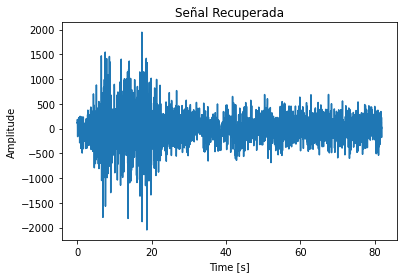

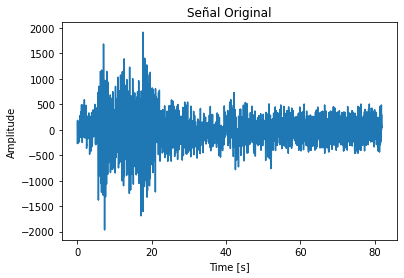

In [6]:
numero=145
muestra=base['Data'][numero]
muestra_arr_ori=np.array(muestra)
samplerate=base['SampleRate'][numero]
f_ori, t_ori, Zxx_ori = signal.stft(muestra_arr_ori, fs=samplerate, padded=True)
espectro_magnitud_ori = np.abs(Zxx_ori)
timee, muestra_rec=grifflin.reconstruir_señal_generador(espectro_magnitud_ori, 10000, samplerate)

tamaño = len(muestra) / samplerate
time = np.linspace(0., tamaño, len(muestra))

plt.plot(timee,muestra_rec)
plt.title("Señal Recuperada")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
plt.plot(time, muestra_arr_ori)
plt.title("Señal Original")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

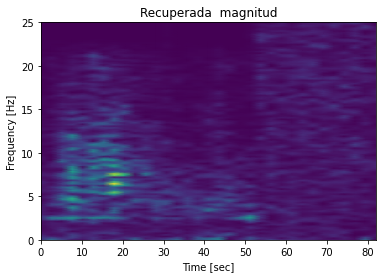

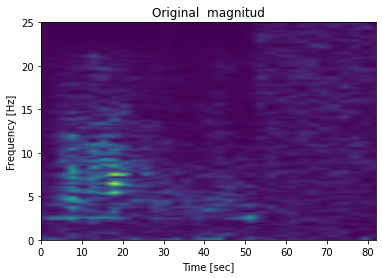

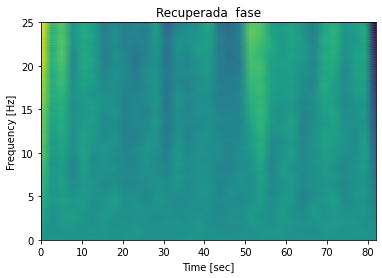

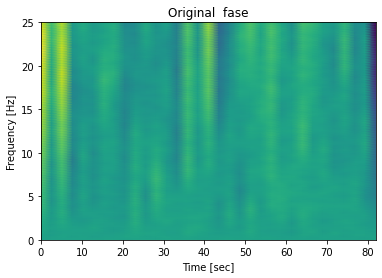

In [7]:
f_ori, t_ori, Zxx_ori = signal.stft(muestra_arr_ori, fs=samplerate, padded=True)
espectro_magnitud_ori = np.abs(Zxx_ori)
espectro_fase_ori = np.unwrap(np.angle(Zxx_ori), axis = 0 )
f_rec, t_rec, Zxx_rec = signal.stft(muestra_rec, fs=samplerate, padded=True)
espectro_magnitud_rec = np.abs(Zxx_rec)
espectro_fase_rec = np.unwrap(np.angle(Zxx_rec), axis=0)

plt.pcolormesh(t_rec, f_rec, espectro_magnitud_rec, shading='gouraud')
plt.title('Recuperada  magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

plt.pcolormesh(t_ori, f_ori, espectro_magnitud_ori, shading='gouraud')
plt.title('Original  magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

plt.pcolormesh(t_rec, f_rec, espectro_fase_rec, shading='gouraud')
plt.title('Recuperada  fase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

plt.pcolormesh(t_ori, f_ori, espectro_fase_ori, shading='gouraud')
plt.title('Original  fase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

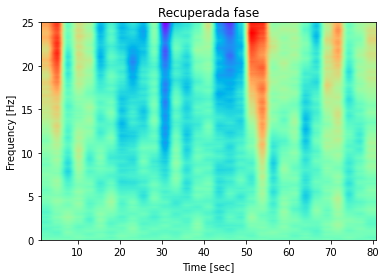

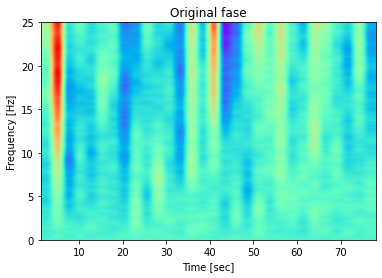

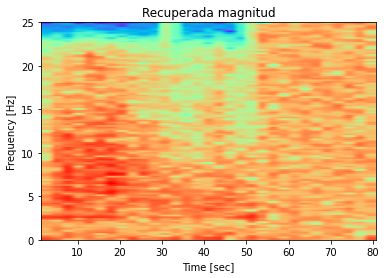

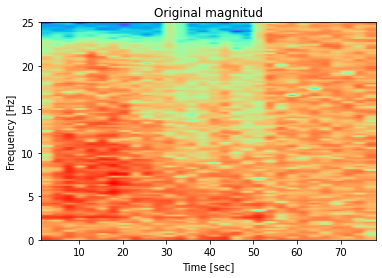

In [8]:
plt.specgram(muestra_rec, Fs=samplerate, cmap="rainbow", mode='phase')
plt.title('Recuperada fase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
plt.specgram(muestra_arr_ori, Fs=samplerate, cmap="rainbow", mode='phase')
plt.title('Original fase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
plt.specgram(muestra_rec, Fs=samplerate, cmap="rainbow", mode='magnitude')
plt.title('Recuperada magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
plt.specgram(muestra_arr_ori, Fs=samplerate, cmap="rainbow", mode='magnitude')
plt.title('Original magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [20]:
muestra = base['Data'][0]
muestra_arr_ori = np.array(muestra)
f_ori, t_ori, zxx_ori = signal.stft(muestra_arr_ori, fs=samplerate, padded=True)
espectro_magnitud = np.abs(zxx_ori)
espectro_magnitud.shape

(129, 33)

In [25]:
s=np.empty([2, 2])
s
v=np.empty([2, 2])
v
s=[s,v]
s[1]


array([[-12.75,  -6.  ],
       [  0.  ,   4.  ]])